In [30]:
import pandas as pd
from tqdm import tqdm
from astropy.table import Table
import astropy.units as u
import matplotlib.pyplot as plt

from shared_astro_utils.matching_utils import match_galaxies_to_catalog_pandas

In [31]:
"""
rsync -azv -e 'ssh -A -J walml@external.jb.man.ac.uk' walml@lofar9:/nvme1/scratch/walml/repos/download_DECaLS_images/catalogs/master_all_file_index_passes_file_checks.parquet  /Users/user/repos/zoobot-3d/data/gz_desi
"""
columns = [
    'ra',
    'dec',
    'brickid',
    'objid',
    'dr8_id',
    'mag_r',
    'mag_g',
    'mag_z',
    'est_dr5_pixscale'
]
gz_desi = pd.read_parquet('/Users/user/repos/zoobot-3d/data/desi/master_all_file_index_passes_file_checks.parquet', columns=columns)
print(gz_desi)


                ra        dec  brickid  objid       dr8_id      mag_r  \
0        32.084931 -44.311422   100000   1081  100000_1081  17.954716   
1        32.140085 -44.293668   100000   1401  100000_1401  18.505297   
2        32.275015 -44.288957   100000   1483  100000_1483  18.853098   
3        32.045648 -44.287172   100000   1509  100000_1509  18.960491   
4        32.170627 -44.267273   100000   1869  100000_1869  18.620411   
...            ...        ...      ...    ...          ...        ...   
8689365  31.827335 -44.348702    99999    492    99999_492  18.222801   
8689366  31.938383 -44.342557    99999    617    99999_617  18.846163   
8689367  31.962693 -44.337562    99999    693    99999_693  17.806503   
8689368  31.938133 -44.335579    99999    704    99999_704  18.939306   
8689369  32.014455 -44.324231    99999    875    99999_875  18.930492   

             mag_g      mag_z  est_dr5_pixscale  
0        19.300152  17.172049               0.1  
1        19.618330  17.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


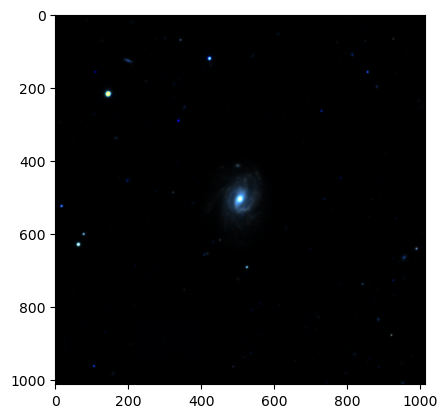

In [33]:
from astropy.io import fits

plt.imshow(fits.open('data/desi/fits/402520/402520_1718.fits')[0].data.transpose(1, 2, 0))

In [34]:
# manga = Table.read('/Users/user/repos/zoobot-3d/data/MaNGA_GZD_auto-v1_0_1.fits')[['MANGAID', 'NSA_IAUNAME', 'OBJRA', 'OBJDEC', 'Z', 'MNGTARG1', 'MNGTARG2', 'MNGTARG3', 'IFUDESIGNSIZE']].to_pandas()
# manga['MANGAID'] = manga['MANGAID'].str.decode('utf8')
# manga['NSA_IAUNAME'] = manga['NSA_IAUNAME'].str.decode('utf8')
# manga
# # unfortunately these are the 3.6k OBSERVED, but I want the candidate targets for segmentation labels

In [35]:
manga = pd.read_csv('/Users/user/repos/zoobot-3d/data/gz3d/reconstructed_gz3d_catalog.csv')
manga

,ra,dec,mangaid,iauname,ifudesignsize,manga_tileid,nsa_id,explorer_link,gz_total_classifications,gz_bar_votes,gz_spiral_votes,sample,local_gz3d_fits_loc
0,119.633810,52.597965,1-379196,J075832.13+523552.8,127.0,6052.0,401171,http://skyserver.sdss.org/dr13/en/tools/chart/...,0,0,0,NaN,data/gz3d/fits_gz/gz3d_1-379196_127_14728482.f...
1,123.172966,40.414574,1-122586,J081241.50+402452.4,19.0,6080.0,129826,http://skyserver.sdss.org/dr13/en/tools/chart/...,83,14,6,"sdss_lost_set,original",data/gz3d/fits_gz/gz3d_1-122586_19_14716382.fi...
2,130.662580,22.271725,1-413080,J084239.01+221618.3,37.0,6630.0,436909,http://skyserver.sdss.org/dr13/en/tools/chart/...,44,5,0,original,data/gz3d/fits_gz/gz3d_1-413080_37_14730227.fi...
3,41.068295,0.341599,1-37002,J024416.39+002029.7,127.0,7712.0,39428,http://skyserver.sdss.org/dr13/en/tools/chart/...,106,0,0,"stripe82,stripe82",data/gz3d/fits_gz/gz3d_1-37002_127_14711001.fi...
4,141.138980,18.005377,1-472134,J092433.35+180019.3,37.0,6599.0,499434,http://skyserver.sdss.org/dr13/en/tools/chart/...,40,7,1,original,data/gz3d/fits_gz/gz3d_1-472134_37_14734003.fi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29808,223.061890,1.923668,1-70182,J145214.85+015525.1,37.0,7209.0,74385,http://skyserver.sdss.org/dr13/en/tools/chart/...,26,9,3,original,data/gz3d/fits_gz/gz3d_1-70182_37_14713371.fit...
29809,220.557370,8.676692,1-631080,J144213.49+084037.9,37.0,7205.0,682826,http://skyserver.sdss.org/dr13/en/tools/chart/...,38,37,28,original,data/gz3d/fits_gz/gz3d_1-631080_37_14743916.fi...
29810,134.990800,47.668700,1-123603,J085957.79+474007.3,37.0,6104.0,130907,http://skyserver.sdss.org/dr13/en/tools/chart/...,84,2,0,"sdss_lost_set,original",data/gz3d/fits_gz/gz3d_1-123603_37_14716427.fi...
29811,243.424910,13.028250,1-499517,J161341.97+130141.6,61.0,7559.0,528197,http://skyserver.sdss.org/dr13/en/tools/chart/...,46,3,17,original,data/gz3d/fits_gz/gz3d_1-499517_61_14736187.fi...


In [36]:
# radii = range(1, 15)
# matches = []
# for match_radius in tqdm(radii):
#     matched, _ = match_galaxies_to_catalog_pandas(manga, gz_desi, matching_radius= match_radius * u.arcsec)
#     matches.append(100 * len(matched)/len(manga))

# plt.plot(radii, matches)
# plt.xlabel('Radii (arcsec)')
# plt.ylabel('Match percentage')
# plt.axhline(100., color='r', linestyle='--', alpha=.5)

# curve of matches vs. arcsec, knee at 3 arcsec

In [37]:
# radii = range(1, 15)
# matches = []
# for match_radius in tqdm(radii):
#     matched, _ = match_galaxies_to_catalog_pandas(manga, gz_desi, matching_radius= match_radius * u.arcsec)
#     matches.append(100 * len(matched)/len(manga))

# plt.plot(radii, matches)
# plt.xlabel('Radii (arcsec)')
# plt.ylabel('Match percentage')
# plt.axhline(100., color='r', linestyle='--', alpha=.5)

In [38]:
manga_desi_matches, manga_desi_misses = match_galaxies_to_catalog_pandas(
    manga, gz_desi, matching_radius= 3 * u.arcsec,
    galaxy_suffix='_manga', catalog_suffix='_desi')

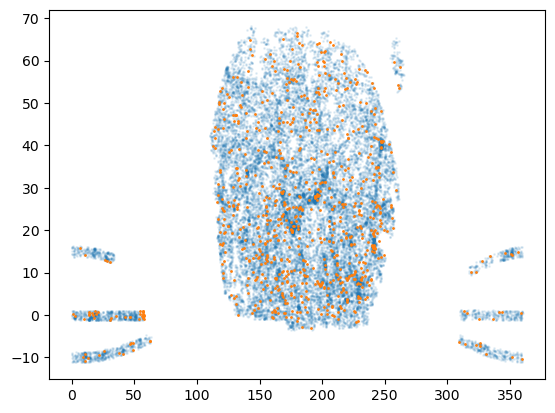

In [39]:
plt.scatter(manga_desi_matches['ra_desi'], manga_desi_matches['dec_desi'], alpha=.1, s=1.)
plt.scatter(manga_desi_misses['ra'], manga_desi_misses['dec'], s=1.)

Text(0, 0.5, 'Matched galaxies at 3 arcsec')

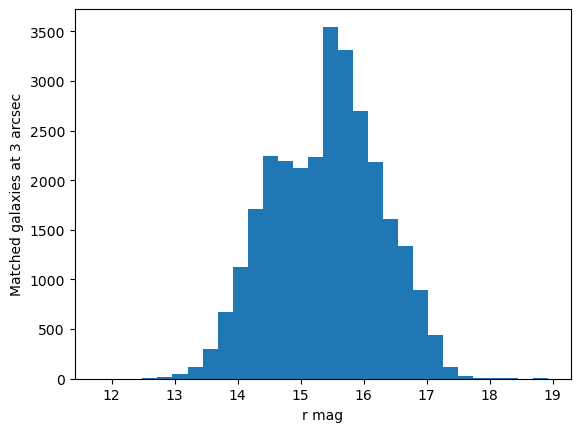

In [40]:
_ = plt.hist(manga_desi_matches['mag_r'], bins=30)
plt.xlabel('r mag')
plt.ylabel('Matched galaxies at 3 arcsec')

In [41]:
# match SAMI similarly

In [42]:
from astropy.table import Table

In [43]:
sami_targets = Table.read('/Users/user/repos/zoobot-3d/data/sami/sami_fits.tar.gz').to_pandas()
for byte_col in ['CATID', 'RA_OBJ', 'DEC_OBJ', 'RA_IFU', 'DEC_IFU']:
    sami_targets[byte_col] = sami_targets[byte_col].str.decode('utf8')
sami_targets = sami_targets.rename(columns={'RA_OBJ': 'ra', 'DEC_OBJ': 'dec'})
sami_targets

,CATID,ra,dec,RA_IFU,DEC_IFU,r_petro,r_auto,z_tonry,z_spec,M_r,...,mu_within_1re,mu_1re,mu_2re,ellip,PA,Mstar,g_i,A_g,SURV_SAMI,BAD_CLASS
0,92683,217.20616405,0.62545319,217.20616405,0.62545319,17.007000,17.039000,0.05214,0.05130,-19.799999,...,20.520000,21.299999,23.059999,0.4264,9.600006,9.59,0.59,0.142,3,0
1,594790,221.70823779,-0.19296962,221.70823779,-0.19296962,16.108999,16.077999,0.08092,0.08014,-21.799999,...,21.910000,22.690001,24.450001,0.1077,41.699997,10.56,0.85,0.146,3,0
2,382362,136.38581099,2.03944576,136.38581099,2.03944576,15.319000,15.313000,0.05297,0.05188,-21.590000,...,19.840000,20.629999,22.389999,0.3230,98.429993,10.61,0.98,0.164,8,0
3,493799,222.42628787,-1.18880541,222.42628787,-1.18880541,19.547001,19.493999,0.04263,0.04189,-16.900000,...,20.910000,21.700001,23.459999,0.5386,57.449997,8.64,0.86,0.185,3,0
4,372374,135.4779428,1.17196309,135.4779428,1.17196309,15.767000,15.722000,0.02010,0.01937,-18.980000,...,21.490000,22.280001,24.040001,0.5870,52.519989,9.28,0.59,0.204,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531,214855,131.96047518,0.59846904,131.96047518,0.59846904,18.614000,17.229000,0.11124,0.11015,-21.510000,...,26.030001,27.770000,29.309999,0.7005,27.790009,11.25,1.80,0.168,4,1
5532,508470,217.09625756,-1.53663067,217.09625756,-1.53663067,16.465000,16.465000,0.05714,0.05629,-20.600000,...,23.750000,25.540001,27.080000,0.0753,49.660004,10.14,0.90,0.196,8,0
5533,727523,134.47418305,2.29975641,134.47418305,2.29975641,19.464001,17.171000,0.04203,0.04098,NaN,...,23.600000,25.850000,27.370001,0.6037,160.459991,9.54,0.65,0.134,8,1
5534,955328,214.37610494,-0.72873232,214.37610494,-0.72873232,24.306000,16.268999,0.06774,0.06684,-21.299999,...,23.580000,25.840000,27.350000,0.1202,147.880005,11.39,2.45,0.178,8,1


In [44]:
sami_targets.columns.values

array(['CATID', 'ra', 'dec', 'RA_IFU', 'DEC_IFU', 'r_petro', 'r_auto',
       'z_tonry', 'z_spec', 'M_r', 'r_e', 'mu_within_1re', 'mu_1re',
       'mu_2re', 'ellip', 'PA', 'Mstar', 'g_i', 'A_g', 'SURV_SAMI',
       'BAD_CLASS'], dtype=object)

In [45]:
sami_targets['ra'] = sami_targets['ra'].astype(float)
sami_targets['dec'] = sami_targets['dec'].astype(float)

In [46]:
# radii = range(1, 15)
# matches = []
# for match_radius in tqdm(radii):
#     matched, _ = match_galaxies_to_catalog_pandas(sami_targets, gz_desi, matching_radius= match_radius * u.arcsec)
#     matches.append(100 * len(matched)/len(sami_targets))

# plt.plot(radii, matches)
# plt.xlabel('Radii (arcsec)')
# plt.ylabel('Match percentage')
# plt.axhline(100., color='r', linestyle='--', alpha=.5)

In [47]:
sami_desi_matches, sami_desi_misses = match_galaxies_to_catalog_pandas(
    sami_targets, gz_desi, matching_radius= 3 * u.arcsec,
    galaxy_suffix='_sami', catalog_suffix='_desi'
)


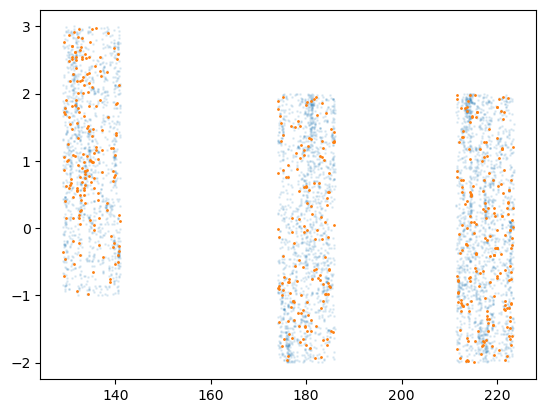

In [48]:
plt.scatter(sami_desi_matches['ra_sami'], sami_desi_matches['dec_sami'], alpha=.1, s=1.)
plt.scatter(sami_desi_misses['ra'], sami_desi_misses['dec'], s=1.)

Text(0, 0.5, 'Matched SAMI galaxies at 3 arcsec')

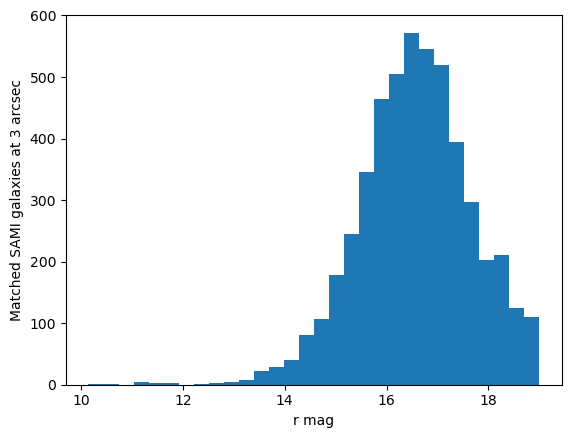

In [49]:
_ = plt.hist(sami_desi_matches['mag_r'], bins=30)
plt.xlabel('r mag')
plt.ylabel('Matched SAMI galaxies at 3 arcsec')

In [50]:
manga_desi_matches.to_csv('data/gz3d_and_gz_desi_matches.csv', index=False)
sami_desi_matches.to_csv('data/gz3d_and_sami_target_matches.csv', index=False)